### Let's import required python module for data preprocessing and calculation

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading datafile and assigning into variable data

In [35]:
data = pd.read_csv('train.csv')

#### Overview of datafile

In [36]:
data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


##### seperate variable for the value we want to observer in final calculation

In [37]:
train_y = data['Survived']

In [38]:
# data['Cabin'].unique()

In [39]:
# data.info()

##### Filling null value of age with respect to passenger gender

In [40]:
female_mean = data.groupby(['Sex']).mean()['Age'][0]
male_mean = data.groupby(['Sex']).mean()['Age'][1]
male_mean

30.72664459161148

In [41]:
# data[data['Sex']=='male']['Age'].fillna(male_mean, inplace=True)
# data[data['Sex']=='female']['Age'].fillna(female_mean, inplace=True)
data['Age'].fillna(data.groupby(["Sex"])["Age"].transform(np.mean), inplace=True)

##### As Name and Ticket has a unique value on each cell so, they are dropped from data

In [42]:
train = data.drop(['Name','Ticket'], axis=1)

In [43]:
train_copy = train.copy()
train_copy = pd.get_dummies(train_copy, columns=['Sex'], prefix='gender')
train_copy.drop('Cabin',axis=1,inplace=True)

In [44]:
train_copy = pd.get_dummies(train_copy, columns=['Embarked'],prefix='Embarked')
# train_copy


In [45]:
# train_x = train_copy.drop('	PassengerId',axis=1)
# train_x.head(5)
a = train_copy.columns[0]
train_x = train_copy.drop(a, axis=1)

In [14]:
# train_x.head(5)
# train_x['Parch'].unique()

In [46]:
data_test = pd.read_csv('test.csv')
data_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
data_test['Age'].fillna(data_test.groupby(["Sex"])["Age"].transform(np.mean), inplace=True)
test = data_test.drop(['Name','Ticket','Cabin',data_test.columns[0]], axis=1)
test_copy = test.copy()
test_copy = pd.get_dummies(test_copy, columns=['Sex'], prefix='gender')
# test_copy.drop('Cabin',axis=1,inplace=True)
test_copy = pd.get_dummies(test_copy, columns=['Embarked'],prefix='Embarked')
# train_copy

In [48]:
test_x = test_copy

In [49]:
test_x.head(5)

,Pclass,Age,SibSp,Parch,Fare,gender_female,gender_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [ ]:
train_x

In [50]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

In [51]:
sclar_train = stdsc.fit_transform(train_x)

In [52]:
sclar_train = pd.DataFrame(sclar_train, columns=train_x.columns)

In [ ]:
sclar_train = pd.get_dummies(sclar_train, columns=['Pclass'],prefix='Pclass')
sclar_train.head(5)

sclar_train = sclar_train.drop('Survived',axis=1)
sclar_train

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(sclar_train, train_y, test_size=0.30,random_state=23)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
from sklearn.metrics import accuracy_score
for k in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train, y_train)
    Y_pred= neigh.predict(x_test)
    print('accuracy for k=',k,' ',accuracy_score(y_test, Y_pred))

accuracy for k= 1   0.7611940298507462
accuracy for k= 2   0.7835820895522388
accuracy for k= 3   0.7835820895522388
accuracy for k= 4   0.7798507462686567
accuracy for k= 5   0.8022388059701493
accuracy for k= 6   0.8171641791044776
accuracy for k= 7   0.8208955223880597
accuracy for k= 8   0.8283582089552238
accuracy for k= 9   0.8059701492537313
accuracy for k= 10   0.8208955223880597
accuracy for k= 11   0.8022388059701493
accuracy for k= 12   0.8097014925373134
accuracy for k= 13   0.7873134328358209
accuracy for k= 14   0.8059701492537313
accuracy for k= 15   0.7910447761194029
accuracy for k= 16   0.8208955223880597
accuracy for k= 17   0.8097014925373134
accuracy for k= 18   0.8097014925373134
accuracy for k= 19   0.8134328358208955


### As k=8 gives highest accuracy. So,k=8 with accuracy of 82.83

In [65]:
error_rate =[]
for i in range(1,120):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

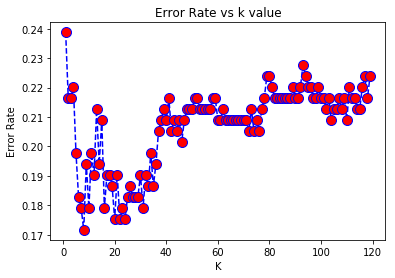

In [66]:
from sklearn.metrics import classification_report,confusion_matrix
plt.xlabel('K')
plt.title('Error Rate vs k value')
plt.ylabel('Error Rate')
plt.plot(range(1,120),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)

In [67]:
np.argmin(error_rate)


7

In [68]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[151  22]
 [ 26  69]]
             precision    recall  f1-score   support

          0       0.85      0.87      0.86       173
          1       0.76      0.73      0.74        95

avg / total       0.82      0.82      0.82       268



In [69]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, knn.predict(x_train))
test_accuracy = accuracy_score(y_test, knn.predict(x_test))
print('training accurecy:',train_accuracy)
print('\n')
print('test accuracy:',test_accuracy)

training accurecy: 0.8651685393258427


test accuracy: 0.8208955223880597


In [70]:
from sklearn.svm import SVC 
model = SVC()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))
train_accuracy = accuracy_score(y_train, model.predict(x_train))
test_accuracy = accuracy_score(y_test, model.predict(x_test))
print('training accurecy:',train_accuracy)
print('\n')
print('test accuracy:',test_accuracy)

[[158  15]
 [ 29  66]]


             precision    recall  f1-score   support

          0       0.84      0.91      0.88       173
          1       0.81      0.69      0.75        95

avg / total       0.83      0.84      0.83       268

training accurecy: 0.8378812199036918


test accuracy: 0.835820895522388


In [71]:
from sklearn.grid_search import GridSearchCV
parameter_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.001,0.0001]}
grid = GridSearchCV(SVC(),parameter_grid,verbose=3)
grid.fit(x_train,y_train)


C:\Users\Sushil\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Sushil\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.688995 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.652174 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.681159 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.784689 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.816425 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.816425 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [72]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [73]:
train_accuracy = accuracy_score(y_train, grid.predict(x_train))
test_accuracy = accuracy_score(y_test, grid.predict(x_test))
print('training accurecy:',train_accuracy)
print('\n')
print('test accuracy:',test_accuracy)

training accurecy: 0.8459069020866774


test accuracy: 0.8283582089552238


In [74]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,prediction))
train_accuracy = accuracy_score(y_train, clf.predict(x_train))
test_accuracy = accuracy_score(y_test, clf.predict(x_test))
print('training accurecy:',train_accuracy)
print('\n')
print('test accuracy:',test_accuracy)

[[141  32]
 [ 25  70]]
             precision    recall  f1-score   support

          0       0.84      0.91      0.88       173
          1       0.81      0.69      0.75        95

avg / total       0.83      0.84      0.83       268

training accurecy: 0.7945425361155698


test accuracy: 0.7873134328358209


In [75]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators =  10, criterion = 'entropy')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,prediction))
train_accuracy = accuracy_score(y_train, clf.predict(x_train))
test_accuracy = accuracy_score(y_test, clf.predict(x_test))
print('training accurecy:',train_accuracy)
print('\n')
print('test accuracy:',test_accuracy)

[[150  23]
 [ 28  67]]
             precision    recall  f1-score   support

          0       0.84      0.91      0.88       173
          1       0.81      0.69      0.75        95

avg / total       0.83      0.84      0.83       268

training accurecy: 0.9695024077046549


test accuracy: 0.8097014925373134


In [77]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,prediction))
train_accuracy = accuracy_score(y_train, clf.predict(x_train))
test_accuracy = accuracy_score(y_test, clf.predict(x_test))
print('training accurecy:',train_accuracy)
print('\n')
print('test accuracy:',test_accuracy)

[[144  29]
 [ 33  62]]
             precision    recall  f1-score   support

          0       0.84      0.91      0.88       173
          1       0.81      0.69      0.75        95

avg / total       0.83      0.84      0.83       268

training accurecy: 0.8154093097913323


test accuracy: 0.7686567164179104


In [78]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_roc_curve(y_test, y_pred)
plt.show()

ModuleNotFoundError: No module named 'scikitplot'